In [2]:
pip install openai python-dotenv Pillow numpy

In [76]:
import os

import openai
from dotenv import load_dotenv
from openai import OpenAI

load_dotenv()
openai.api_key = os.environ["OPENAI_API_KEY"]


client = OpenAI()

file = client.files.create(
    file=open("parking_violation.csv", "rb"), purpose="assistants"
)

assistant = client.beta.assistants.create(
    name="Data visualizer",
    description="You are great at creating beautiful data visualizations. You analyze data present in .csv files, understand trends, and come up with data visualizations relevant to those trends. You also share a brief text summary of the trends observed.",
    model="gpt-4o",
    tools=[{"type": "code_interpreter"}],
    tool_resources={"code_interpreter": {"file_ids": [file.id]}},
)

thread = client.beta.threads.create(
    messages=[
        {
            "role": "user",
            "content": "Create 3 data visualizations based on the trends in this file.",
            "attachments": [
                {"file_id": file.id, "tools": [{"type": "code_interpreter"}]}
            ],
        }
    ]
)

# Submit the thread to the assistant (as a new run).
run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)
print(f"👉 Run Created: {run.id}")


👉 Run Created: run_0T5bjA29hwwIQcLbvYuZHMCL


In [62]:
import time

# Wait for run to complete.
while run.status != "completed":
    run = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
    print(f"🏃 Run Status: {run.status}")
    time.sleep(1)
else:
    print(f"🏁 Run Completed!")


🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status: in_progress
🏃 Run Status

In [75]:
message_response.data[3].content[0].text

Text(annotations=[], value="It appears the file is a CSV containing traffic violation data in New York. The dataset includes columns like summons number, plate ID, registration state, issue date, violation code, vehicle make, and more. Let's create some complex data visualizations based on trends in this dataset. \n\nHere are some potential visualizations:\n1. **Heatmap of Violations by Vehicle Make and Violation Code**\n2. **Time Series Analysis of Violations over Time**\n3. **Geographical Distribution of Violations**\n\nLet's start with the first visualization.")

In [71]:
from openai import OpenAI

client = OpenAI()

image_data = client.files.content(message_response.data[2].content[0].image_file.file_id)
image_data_bytes = image_data.read()

with open("my-image.png", "wb") as file:
    file.write(image_data_bytes)

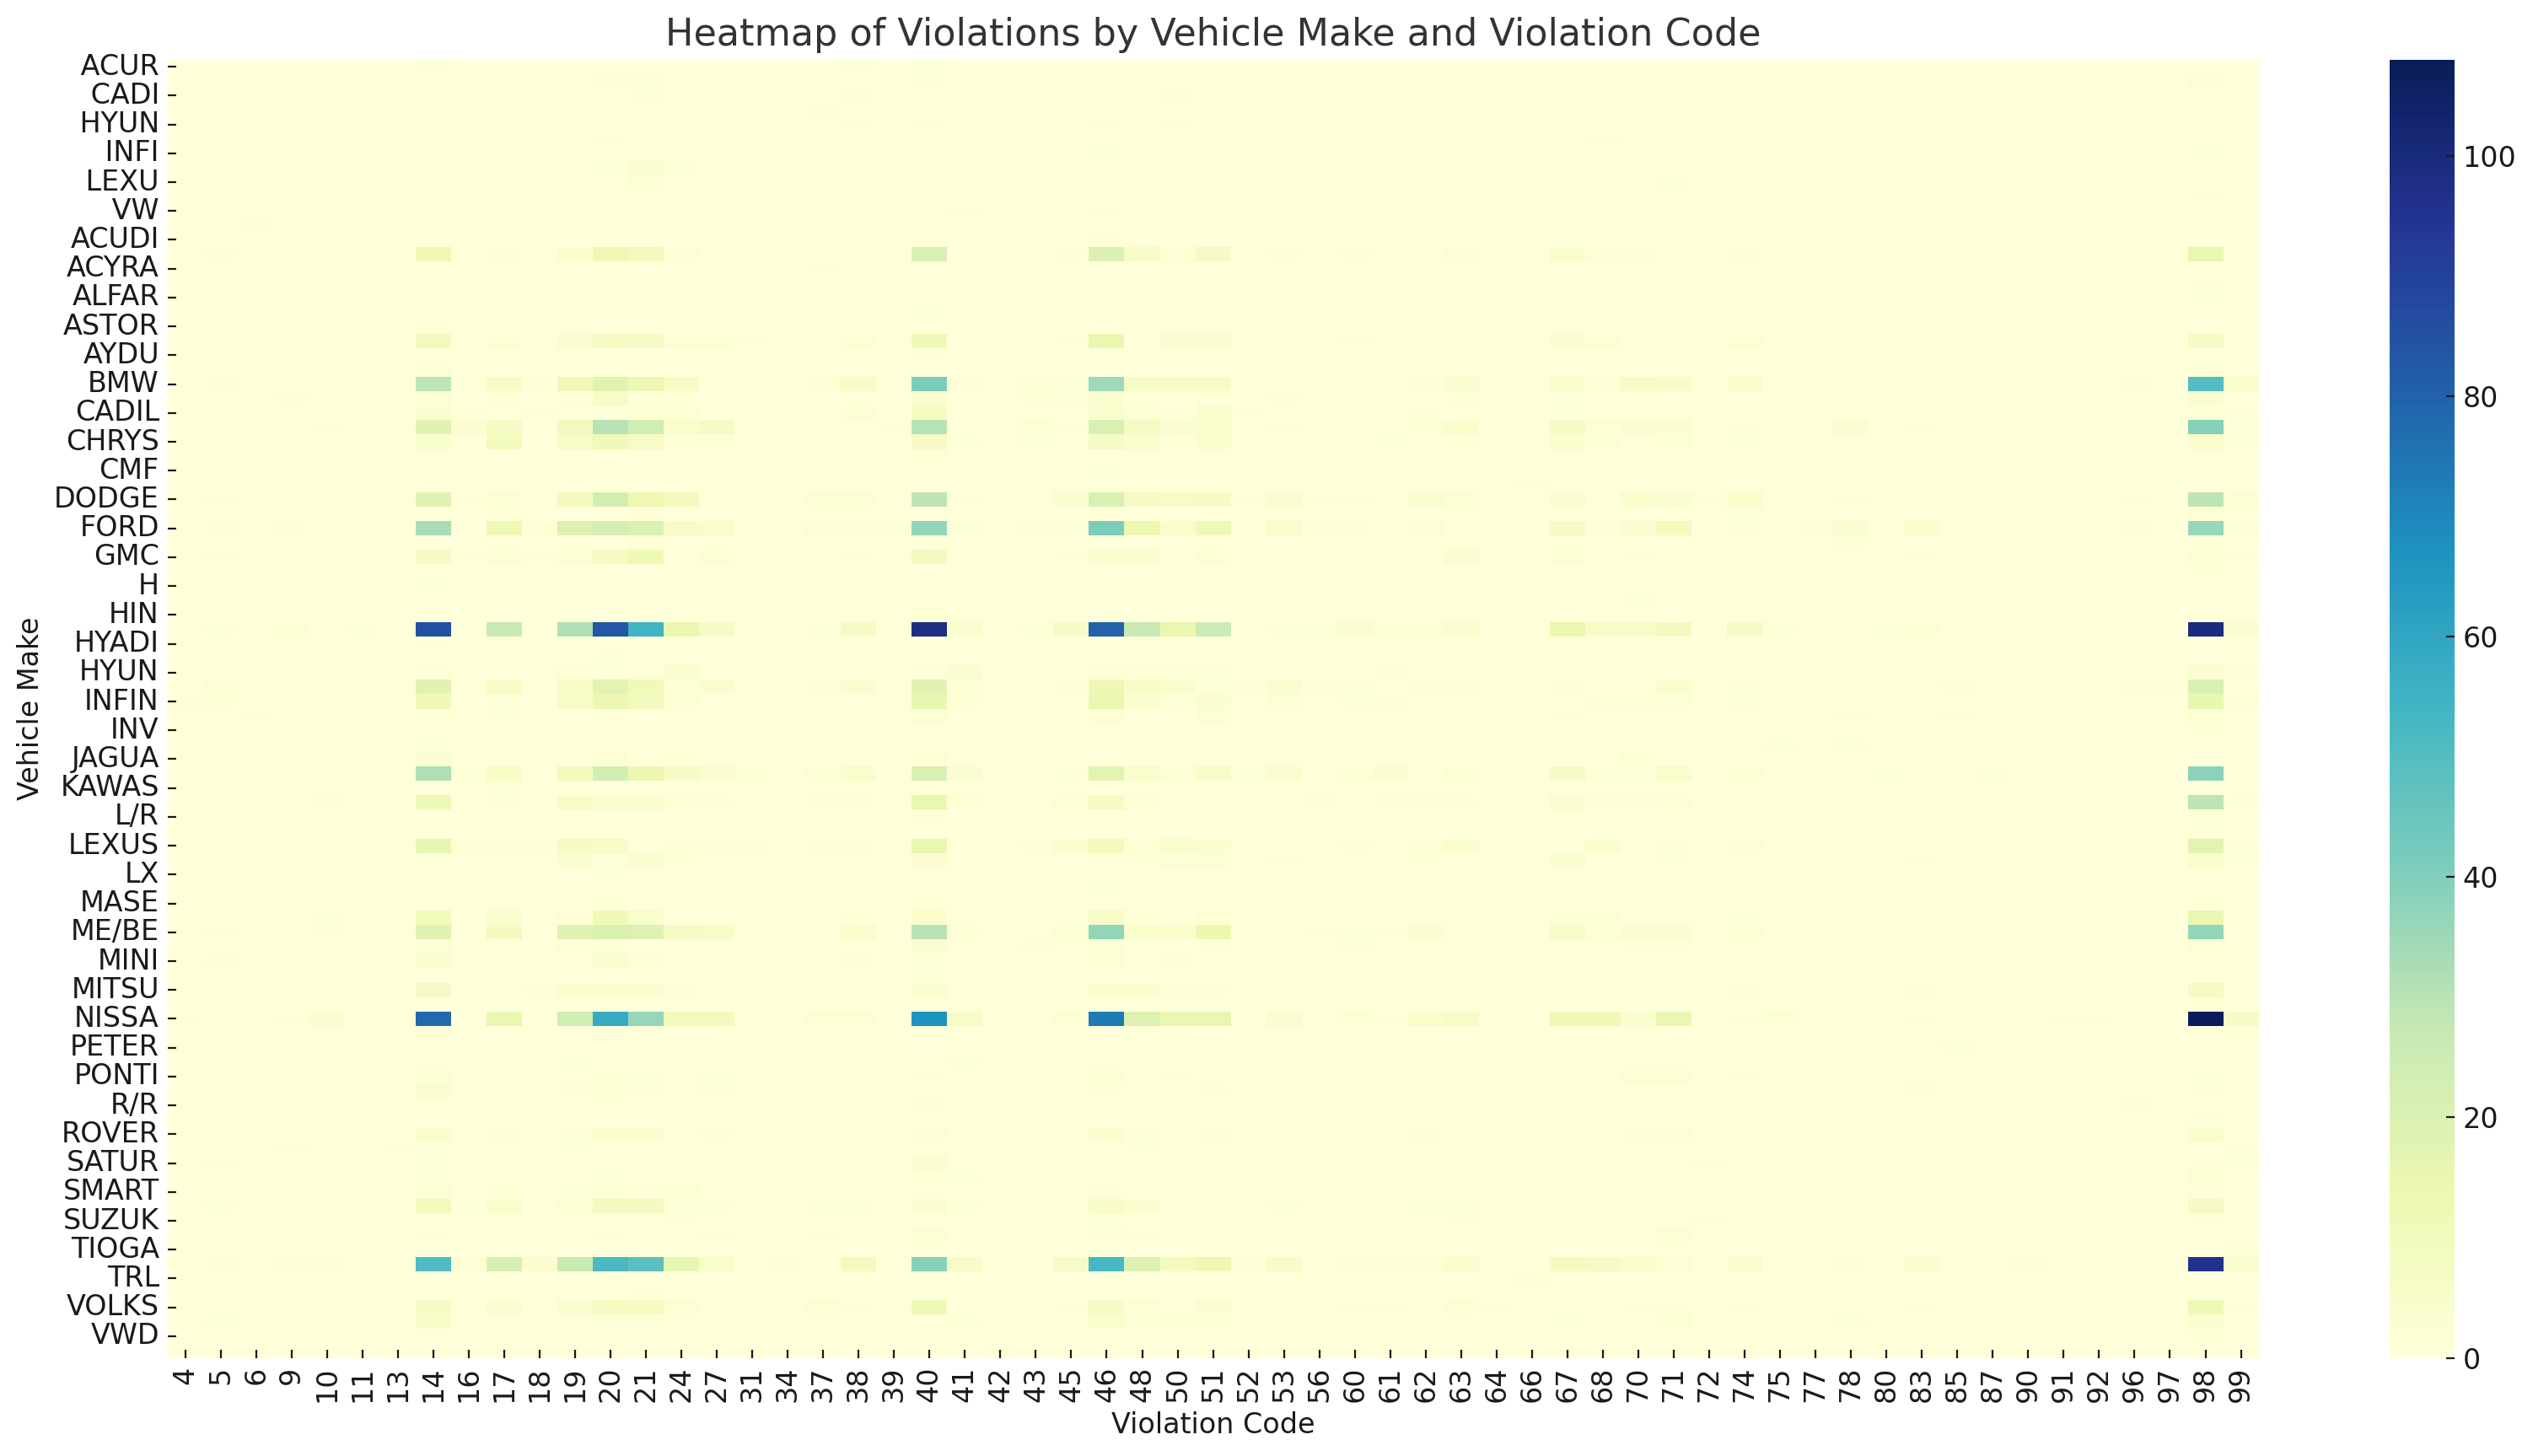

PNG (3004, 1727) RGBA


In [72]:
from PIL import Image

# Open an image file
image = Image.open('my-image.png')

# Display image
image.show()

# If you want to convert the image to a numpy array for further processing
import numpy as np
image_array = np.array(image)

# Print image details
print(image.format, image.size, image.mode)


In [82]:
pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.3 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


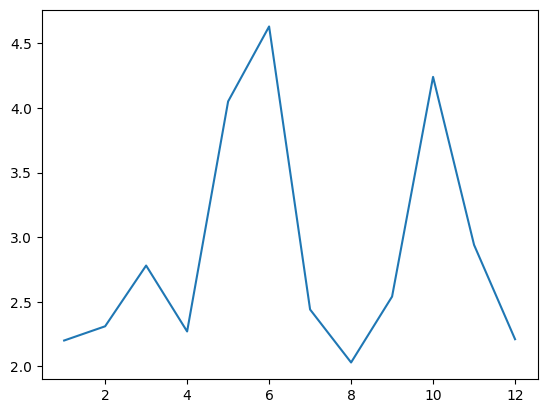

In [83]:
# edited/added
import pandas as pd
import calendar
austin_weather = pd.read_csv('austin_weather.csv')
austin_weather['MONTH'] = austin_weather['DATE']
# seattle_weather = pd.read_csv('seattle_weather.csv')
# seattle_weather = seattle_weather[seattle_weather['STATION'] == 'USW00094290']
# seattle_weather['MONTH'] = seattle_weather['DATE']


# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# # Plot MLY-PRCP-NORMAL from seattle_weather against MONTH
# ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Call the show function
plt.show()